In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grocery-store-dataset/GroceryDataset.csv


In [2]:
data = pd.read_csv("/kaggle/input/grocery-store-dataset/GroceryDataset.csv")
data.sample(10)

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
1733,Snacks,$11.99,No Discount,NaN,"Bimbo Mantecaditas Muffins, Vanilla, 2.47 oz, ...",$,Mantecaditas Muffins Vanilla 2.47 oz Pack ...,Vanilla Flavored Muffins\nEnjoy Them On The Go
540,Coffee,$13.99,No Discount,NaN,"Caffe D'Vita, Instant Mocha Cappuccino, 4 lbs",$,Mocha Cappuccino Gluten Free Store in Dry ...,"Hot,Iced, or Blended Cappuccino Drink Mix\nAls..."
1115,Meat & Seafood,$649.99,No Discount,Rated 4.7 out of 5 stars based on 305 reviews.,"Japanese Wagyu Filet Mignons Steaks, A5 Grade,...",$,"(8) A5 Wagyu Filet Mignons Steaks, 6 ounces ea...","Cut from the heart of the tenderloin, Authenti..."
1309,Pantry & Dry Goods,$8.99,No Discount,NaN,"C&H, Brown Cane Sugar, 7 lbs",$,100% Pure Cane Kosher Non-GMO Project Veri...,Net Weight: 7 lbs
765,Household,$91.79,No Discount,NaN,"HP 902XL High Yield Ink Cartridge, Black, 2-Count",$,"Printer Compatibility: HP OfficeJet Pro: 6968,...",Item may be available in your local warehouse ...
1417,Seafood,$149.99,After $70 OFF,Rated 4.6 out of 5 stars based on 1237 reviews.,Ahi Tuna Individual Vacuum Packed Portion (26-...,$,"Wild, Boneless Ahi Tuna, Frozen 6 oz. Portio...",Ahi means “fire” in Hawaiian and refers to the...
616,Floral,$69.99,No Discount,No Reviews,"Valentine's Day Pre-Order Red, White & Pink Ro...",$,Pick Your Arrival Date at Checkout Gift Mess...,Adorn the one you adore with the Romance Bouqu...
1702,Snacks,$17.99,No Discount,NaN,"Cheez-It White Cheddar Baked Snack Cracker, 1....",$,Cheese Crackers White Cheddar Kosher 210...,Make snack time more fun with Cheez-It White C...
1031,Meat & Seafood,$249.99,No Discount,Rated 2.6 out of 5 stars based on 18 reviews.,Authentic Wagyu Japanese A5 Bacon Wrapped Cube...,$,A5 Japanese Wagyu Bacon Wrapped Trays 3pk -1...,"To achieve the best results, cook the cubes fr..."
60,Beverages & Water,$23.49,No Discount,NaN,"C4 Performance Energy Drink, Frozen Bombsicle,...",$,Frozen Bombsicle 16 fl oz Cans 12 Total Ca...,Performance Energy Drink\nZero Sugar\nZero Cal...


1. Check for Missing Value
1. Fix datatype
1. encode categorical data
1. change rating column to something numerical value
1. Fetch quantiy from title
1. check out differnt currency to purchases

In [3]:
data.shape

(1757, 8)

## 1. Check and Fix Missing Value
> Here, I can see Price column has 3 missing value, Rating has 1075 missing value, currency has 5, Feature has 18 and Product Discription has 42 missing value.

In [4]:
data.isnull().sum()

Sub Category              0
Price                     3
Discount                  0
Rating                 1075
Title                     0
Currency                  5
Feature                  18
Product Description      42
dtype: int64

### 1.a). Find missing value percentage.
- if any column has more then 60 percentage of data is missing value then it is good idea to remove that columns
- Missing Value Percentage = (Total Number of Values/Number of Missing Values)×100

In [5]:
def find_percentage(columns_name):
    missing_cnt = columns_name.isnull().sum()
    total_cnt = columns_name.shape
    missing_percentage = ((missing_cnt/total_cnt)*100).round(2)
    return missing_percentage

In [6]:
data.apply(find_percentage)

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,0.0,0.17,0.0,61.18,0.0,0.28,1.02,2.39


### 1.b). Drop Rating Column 

In [7]:
#since Rating has 61.18 percentage of null value so drop the columns
data.drop(['Rating'], axis=1, inplace=True)

### 1.c). Handle Missing Value
1. Price
1. Currency
1. Feature
1. Product Description

In [8]:
data['Price'] = data['Price'].str.replace('[^\d.]', '', regex=True)

In [9]:
data[data['Price'].isnull()]

,Sub Category,Price,Discount,Title,Currency,Feature,Product Description
1064,Meat & Seafood,NaN,.,"Hillshire Farm Slow Roasted Turkey Breast, 11 ...",NaN,Gluten Free No Artificial Ingredients No N...,Available at your local Costco warehouse or cl...
1414,Poultry,NaN,.,"Hillshire Farm Slow Roasted Turkey Breast, 11 ...",NaN,Gluten Free No Artificial Ingredients No N...,Available at your local Costco warehouse or cl...
1480,Snacks,NaN,Costco Members Receive an Additional $5 OFF Ca...,FITCRUNCH - Costco Next,NaN,Non-GMO Gluten Free Soy Free Flavor Mixo...,Shop Costco Next Chef Robert Irvine’s FITCRU...


In [10]:
data['Price'].isnull().sum()

3

In [11]:
df = data.dropna().copy()
df.shape

(1696, 7)

In [12]:
df.isnull().sum()

Sub Category           0
Price                  0
Discount               0
Title                  0
Currency               0
Feature                0
Product Description    0
dtype: int64

### 1.d). Drop 'Currency' Columns

In [13]:
df.Currency.unique()

array(['$'], dtype=object)

In [14]:
df.drop(['Currency'], axis=1, inplace=True)

In [15]:
df.head()

,Sub Category,Price,Discount,Title,Feature,Product Description
0,Bakery & Desserts,56.99,No Discount,"David’s Cookies Mile High Peanut Butter Cake, ...","""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,159.99,No Discount,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,44.99,No Discount,"St Michel Madeleine, Classic French Sponge Cak...",100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,39.99,No Discount,"David's Cookies Butter Pecan Meltaways 32 oz, ...",Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,59.99,No Discount,"David’s Cookies Premier Chocolate Cake, 7.2 lb...","""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


## 2. Check for datatype

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1696 entries, 0 to 1756
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sub Category         1696 non-null   object
 1   Price                1696 non-null   object
 2   Discount             1696 non-null   object
 3   Title                1696 non-null   object
 4   Feature              1696 non-null   object
 5   Product Description  1696 non-null   object
dtypes: object(6)
memory usage: 92.8+ KB


In [17]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'] = df['Price'].round(2)

## 3. Distribution of 'Price columns'

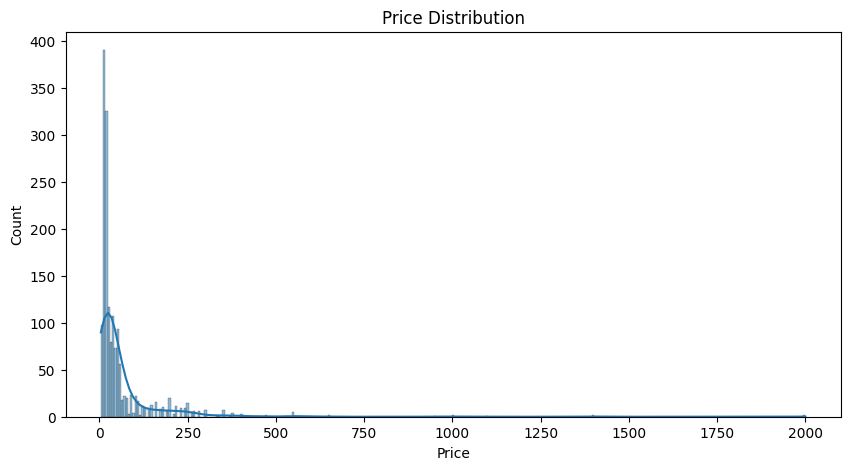

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Price", kde=True)
plt.title("Price Distribution")
plt.show()

## 4. Sales of each Sub Category
> by looking to the all the boxplot, I can clearly see that most expension sub category item is 'deli' and least expensive item is 'breakfast.

In [19]:
print(data['Sub Category'].unique())
print("\nTotal Sub Category count =", data['Sub Category'].nunique())

['Bakery & Desserts' 'Beverages & Water' 'Breakfast' 'Candy'
 'Cleaning Supplies' 'Coffee' 'Deli' 'Floral' 'Gift Baskets' 'Household'
 'Kirkland Signature Grocery' 'Laundry Detergent & Supplies'
 'Meat & Seafood' 'Organic' 'Pantry & Dry Goods'
 'Paper & Plastic Products' 'Poultry' 'Seafood' 'Snacks']

Total Sub Category count = 19


In [20]:
df.Price.unique()

array([  56.99,  159.99,   44.99,   39.99,   59.99,   74.99,   29.99,
         62.99,  299.99,   54.99,   89.99,   49.99,   99.99,   24.99,
         72.99,  119.99,  109.99,   34.99,   27.99,   21.99,   20.99,
         19.99,  439.99,    9.99,   14.99,   18.99,   21.49,   17.99,
         23.99,    4.99,   12.99,   32.99,   13.79,   23.49,   22.99,
          8.99,   15.99,   28.99,   16.49,  549.99,   17.49,   25.99,
         11.69,   69.99,   21.79,   37.99,  139.99,   41.99,   18.49,
         16.99,   36.99,   10.99,   61.99,   17.59,   11.99,   24.49,
         10.49,    9.69,    8.19,    9.49,   12.49,   12.69,   31.99,
         15.49,   46.99,   11.49,   16.39,   13.99,   38.99,   26.99,
         13.49,   14.49,   26.69,   42.99,   45.99,    7.99,   25.69,
         19.49,   10.79,   17.89,   84.99,     nan,   20.89,    9.79,
         29.89,  199.99,   47.99,   18.39,   43.99,   33.99,   28.49,
         10.29,   35.99,   48.99,   29.69,  149.99,  649.99, 1999.99,
        124.99,  249

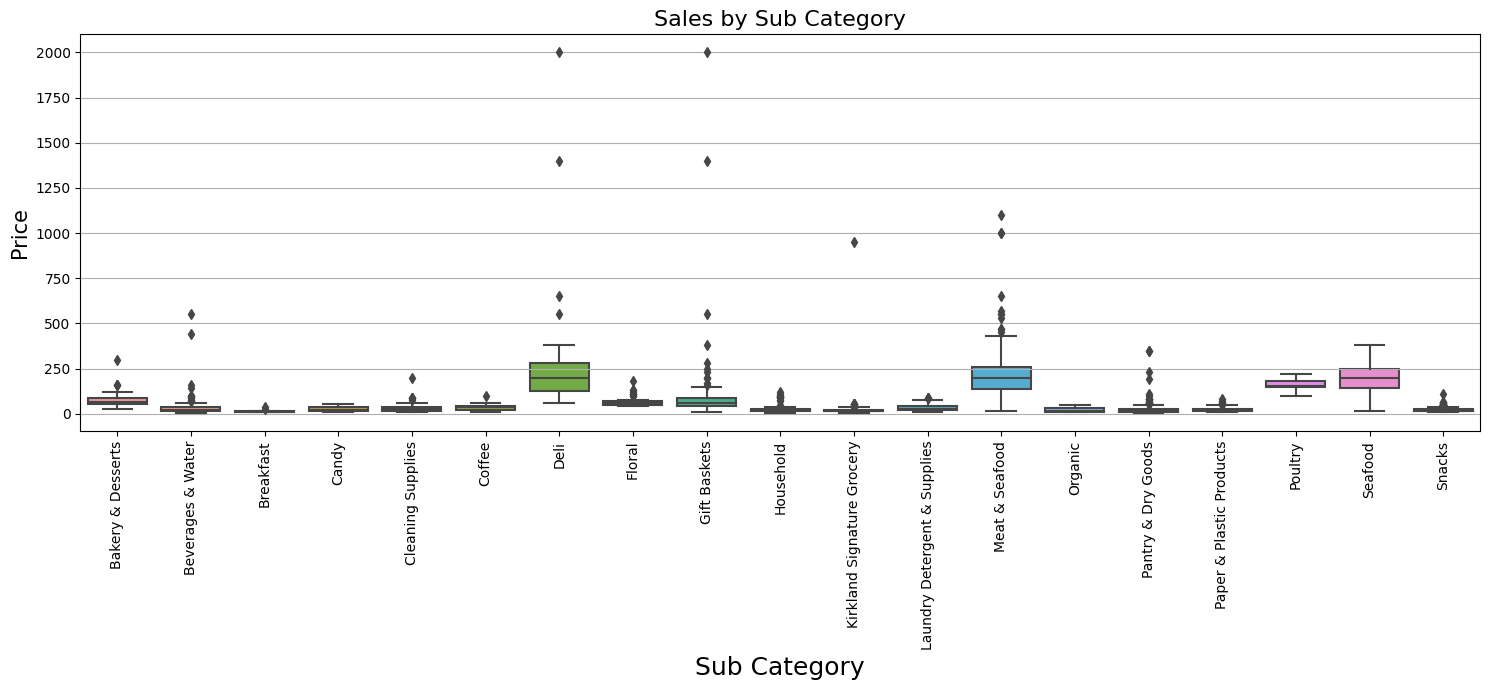

In [21]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Sub Category', y='Price', data=df)

plt.xticks(rotation=90)
plt.xlabel('Sub Category', fontsize=18)
plt.ylabel('Price', fontsize=15)
plt.title('Sales by Sub Category', fontsize=16)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

## 5. Total Items Each Sub Category have.
> since there is no where given the total item per category, so we will group by with 'sub category' column and count the price of 'sub category' columns, this way we will get the number of items each sub category have

In [22]:
no_of_items_per_category = df.groupby(by='Sub Category')['Title'].count()
no_of_items_per_category = no_of_items_per_category.reset_index()
no_of_items_per_category = no_of_items_per_category.rename(columns={'Title': 'total_items'})
no_of_items_per_category = no_of_items_per_category.sort_values(by="total_items", ascending=False)
no_of_items_per_category

,Sub Category,total_items
18,Snacks,290
14,Pantry & Dry Goods,171
3,Candy,153
1,Beverages & Water,147
12,Meat & Seafood,143
10,Kirkland Signature Grocery,117
5,Coffee,89
8,Gift Baskets,89
4,Cleaning Supplies,85
15,Paper & Plastic Products,76


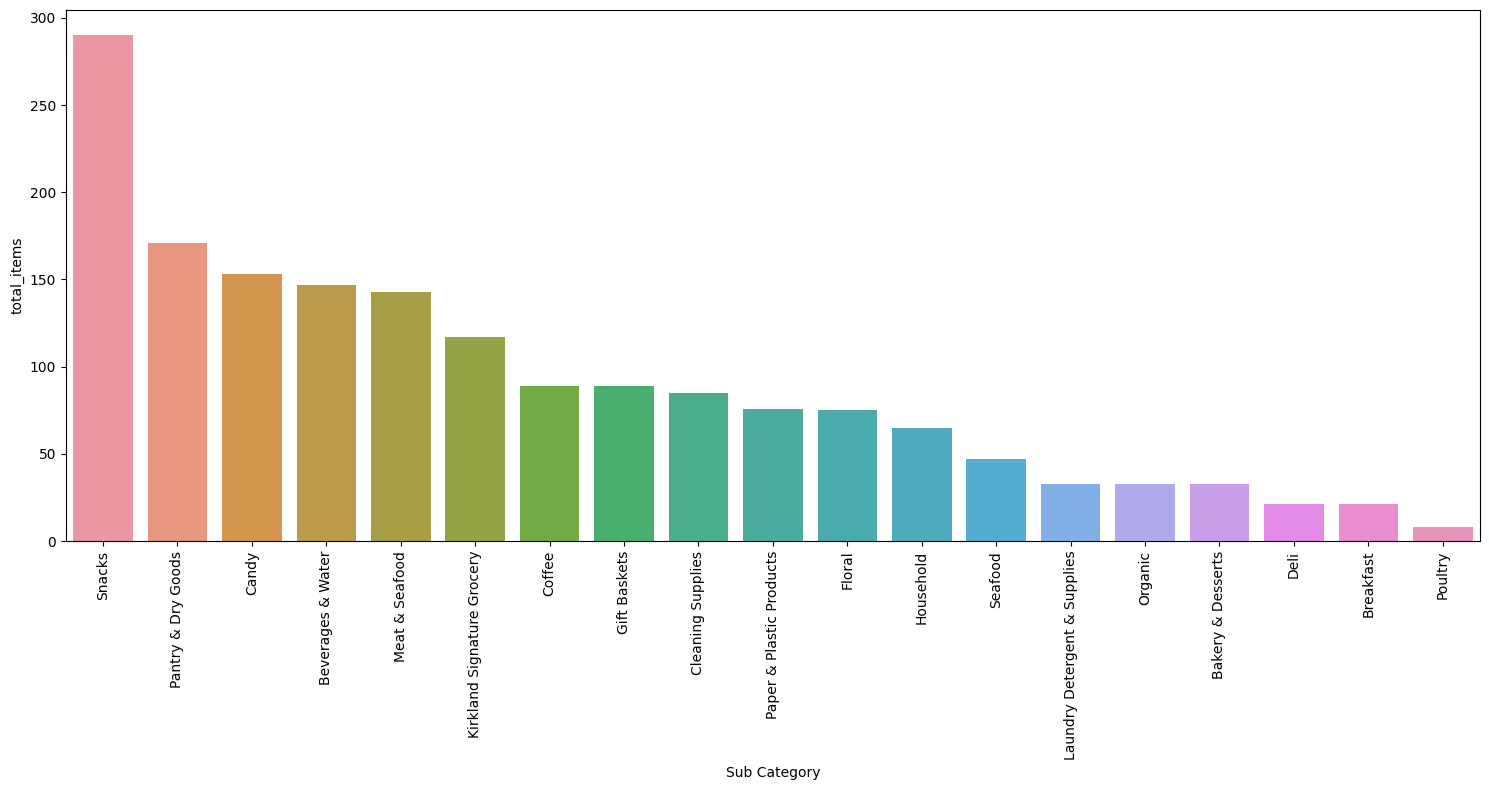

In [23]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=no_of_items_per_category, x='Sub Category', y='total_items')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

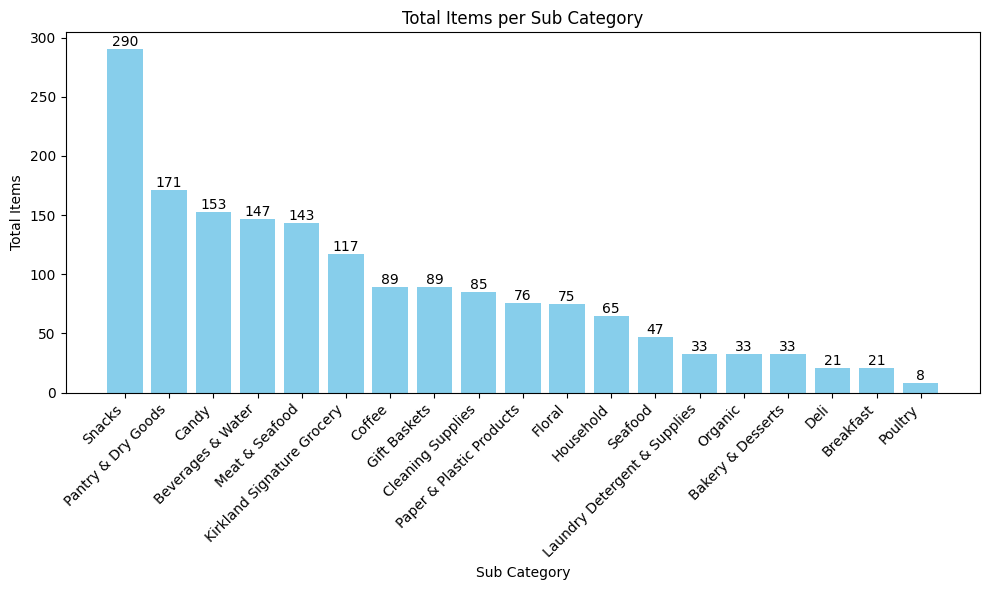

In [24]:
# Creating a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(no_of_items_per_category['Sub Category'].astype(str), no_of_items_per_category['total_items'], color='skyblue')

# Adding total_items notation to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Setting labels and title
plt.xlabel('Sub Category')
plt.ylabel('Total Items')
plt.title('Total Items per Sub Category')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

## 6. Maximum Revenu Generated by Each Sub Category 

In [25]:
revenue_df = df.groupby(by='Sub Category')['Price'].sum()
revenue_df = revenue_df.reset_index()
revenue_df = revenue_df.rename(columns={'Price': 'Revenue'})
revenue_df = revenue_df.sort_values(by="Revenue", ascending=False)
revenue_df

,Sub Category,Revenue
12,Meat & Seafood,32418.58
8,Gift Baskets,10568.11
17,Seafood,9189.51
6,Deli,7784.79
18,Snacks,6255.00
1,Beverages & Water,5372.13
14,Pantry & Dry Goods,4976.69
7,Floral,4338.35
3,Candy,3841.67
10,Kirkland Signature Grocery,3335.63


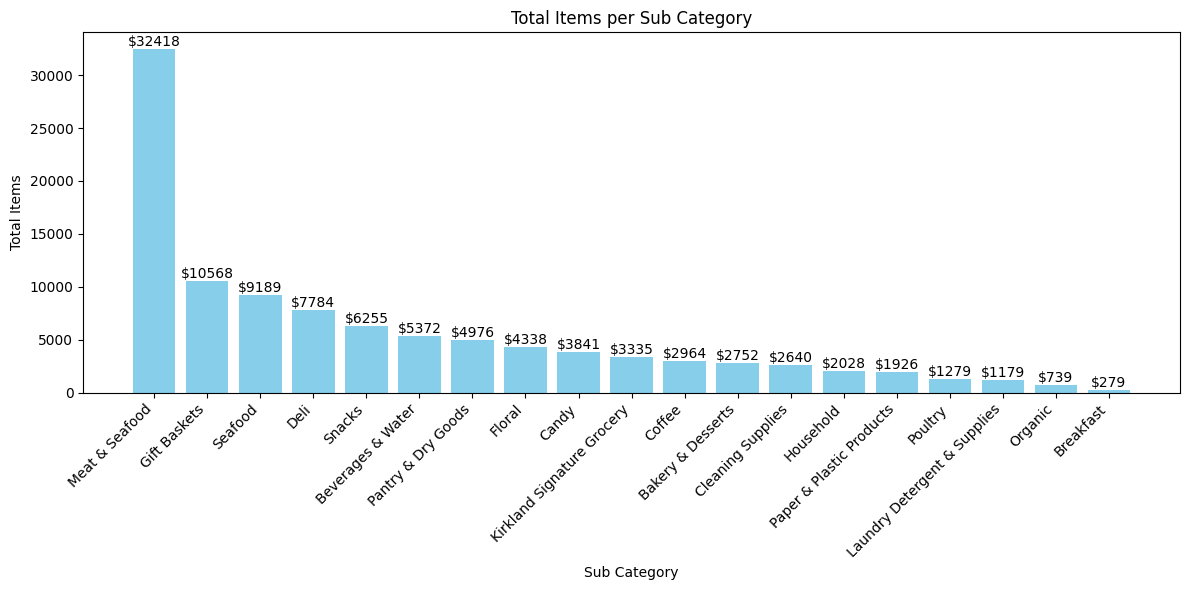

In [26]:
# Creating a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(revenue_df['Sub Category'].astype(str), revenue_df['Revenue'], color='skyblue')

# Adding total_items notation to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, "$"+str(int(yval)), ha='center', va='bottom')

# Setting labels and title
plt.xlabel('Sub Category')
plt.ylabel('Total Items')
plt.title('Total Items per Sub Category')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

## 7. Top 3 Revenue Generated Sub Category are follow:
1. Meat & Seafood
1. Gift Baskets
1. Seafood
> Come to with conclusion why these 3 are most revenue generated Sub category?


In [27]:
data.head()

,Sub Category,Price,Discount,Title,Currency,Feature,Product Description
0,Bakery & Desserts,56.99,No Discount,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,159.99,No Discount,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,44.99,No Discount,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,39.99,No Discount,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,59.99,No Discount,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


In [28]:
data.Discount.unique()

array(['No Discount', 'After $30 OFF', 'After $5 OFF',
       'This item is not returnable.', 'After $20 OFF', 'After $4.50 OFF',
       'After $4 OFF', 'After $2.80 OFF', 'After $8 OFF',
       'After $3.60 OFF', 'After $3 OFF', 'After $1.50 OFF',
       'After $3.30 OFF', 'After $6 OFF', 'After $2.40 OFF',
       'After $2.20 OFF', 'After $12 OFF', 'After $3.10 OFF',
       'After $5.60 OFF', 'After $2.70 OFF', 'After $10 OFF',
       'After $9.30 OFF', 'After $50 OFF', 'After $2.50 OFF',
       'After $70 OFF', 'After $60 OFF', 'After $40 - $80 OFF',
       'After $40 - $70 OFF', 'After $40 OFF', 'After $80 OFF', '.',
       'After $3.50 OFF', 'Limit 1 Per Member', 'Limit 5 Per Member',
       'After $6.50 OFF', 'After $3.80 OFF', 'After $2.60 OFF',
       'After $7 OFF',
       'Costco Members Receive an Additional $5 OFF Caramel Peanut Protein Bars with FitCrunch through Costco Next',
       'After $4.10 OFF', 'After $2 OFF', 'After $2.30 OFF'], dtype=object)

In [29]:
Meat_Seafood = data[data['Sub Category'] == "Meat & Seafood"]
Gift_Baskets = data[data['Sub Category'] == "Gift Baskets"]
Seafood = data[data['Sub Category'] == "Seafood"]

>Becasue of high number of discount on the Meat and Seafood sub category, so it generated more revenue.

In [30]:
print(Meat_Seafood.Discount.unique())
Meat_Seafood.head(3)

['After $70 OFF' 'After $60 OFF' 'No Discount' 'After $40 - $80 OFF'
 'After $40 - $70 OFF' 'After $30 OFF' 'After $40 OFF' 'After $80 OFF' '.']


,Sub Category,Price,Discount,Title,Currency,Feature,Product Description
972,Meat & Seafood,149.99,After $70 OFF,Ahi Tuna Individual Vacuum Packed Portion (26-...,$,"Wild, Boneless Ahi Tuna, Frozen 6 oz. Portio...",Ahi means “fire” in Hawaiian and refers to the...
973,Meat & Seafood,229.99,After $60 OFF,Chicago Steak USDA Prime Beef Wet Aged Boneles...,$,8 USDA Prime Wet Aged Boneless NY Strips (12 O...,These tender Boneless Strips and juicy Gourmet...
974,Meat & Seafood,239.99,After $60 OFF,Alaska Home Pack Frozen Sea Cucumber - 3 Packs...,$,Please Check Below for Pack Contents Wild & ...,Semi-dehydrated then frozen Sea Cucumber Skins...


In [31]:
print(Gift_Baskets.Discount.unique())
Gift_Baskets.head(3)

['No Discount' 'After $50 OFF' 'After $20 OFF' 'After $30 OFF']


,Sub Category,Price,Discount,Title,Currency,Feature,Product Description
641,Gift Baskets,11.99,No Discount,"Kirkland Signature Caramel S’mores Clusters, 2...",$,"Kosher Resealable Bag Store in Cool, Dry, ...",Delicious clusters of graham crackers and mars...
642,Gift Baskets,39.99,No Discount,Vacaville Fruit Company 56 oz Dried Fruit & N...,$,2 Types of Peaches (USA) Mango Slices (Thail...,This delightfully arranged Dried Fruit & Nut W...
643,Gift Baskets,49.99,No Discount,The Fruit Company Classic 5-box Tower,$,Royal Comice Pears Bosc Pears Fuji Apples ...,This year remember everyone on your list with ...


In [32]:
print(Seafood.Discount.unique())
Seafood.head(3)

['After $70 OFF' 'After $60 OFF' 'No Discount']


,Sub Category,Price,Discount,Title,Currency,Feature,Product Description
1417,Seafood,149.99,After $70 OFF,Ahi Tuna Individual Vacuum Packed Portion (26-...,$,"Wild, Boneless Ahi Tuna, Frozen 6 oz. Portio...",Ahi means “fire” in Hawaiian and refers to the...
1418,Seafood,239.99,After $60 OFF,Alaska Home Pack Frozen Sea Cucumber - 3 Packs...,$,Please Check Below for Pack Contents Wild & ...,Semi-dehydrated then frozen Sea Cucumber Skins...
1419,Seafood,14.99,No Discount,"Crown Prince Smoked Oysters in Olive Oil, Fanc...",$,ASC Certified From Managed Fisheries Fresh...,WARNING:Consuming this product can expose you ...


## 8. Create a new dataframe with following columns:-
1. Sub Category Name
1. Total Items
1. Total Revenue
1. Total  $discount on sub category

In [33]:
no_of_items_per_category['revenue'] = revenue_df['Revenue']

In [34]:
new_df = no_of_items_per_category
new_df 

,Sub Category,total_items,revenue
18,Snacks,290,6255.00
14,Pantry & Dry Goods,171,4976.69
3,Candy,153,3841.67
1,Beverages & Water,147,5372.13
12,Meat & Seafood,143,32418.58
10,Kirkland Signature Grocery,117,3335.63
5,Coffee,89,2964.11
8,Gift Baskets,89,10568.11
4,Cleaning Supplies,85,2640.76
15,Paper & Plastic Products,76,1926.44


In [35]:
df.Discount.unique()

array(['No Discount', 'After $30 OFF', 'After $5 OFF',
       'This item is not returnable.', 'After $20 OFF', 'After $4.50 OFF',
       'After $4 OFF', 'After $2.80 OFF', 'After $8 OFF',
       'After $3.60 OFF', 'After $3 OFF', 'After $1.50 OFF',
       'After $3.30 OFF', 'After $6 OFF', 'After $2.20 OFF',
       'After $12 OFF', 'After $3.10 OFF', 'After $5.60 OFF',
       'After $2.70 OFF', 'After $10 OFF', 'After $9.30 OFF',
       'After $50 OFF', 'After $2.50 OFF', 'After $70 OFF',
       'After $60 OFF', 'After $40 - $80 OFF', 'After $40 - $70 OFF',
       'After $40 OFF', 'After $80 OFF', 'After $3.50 OFF',
       'Limit 1 Per Member', 'Limit 5 Per Member', 'After $6.50 OFF',
       'After $3.80 OFF', 'After $2.60 OFF', 'After $7 OFF',
       'After $4.10 OFF', 'After $2 OFF', 'After $2.30 OFF',
       'After $2.40 OFF'], dtype=object)

In [36]:
df.drop(df[df['Discount'] == 'Limit 5 Per Member'].index, inplace=True)

In [37]:
df.drop(df[df['Discount'] == 'Limit 1 Per Member'].index, inplace=True)

In [38]:
df['Discount$'] = df['Discount'].str.replace('[^\d.]', '', regex=True)

In [39]:
df.head()

,Sub Category,Price,Discount,Title,Feature,Product Description,Discount$
0,Bakery & Desserts,56.99,No Discount,"David’s Cookies Mile High Peanut Butter Cake, ...","""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...,
1,Bakery & Desserts,159.99,No Discount,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord...",
2,Bakery & Desserts,44.99,No Discount,"St Michel Madeleine, Classic French Sponge Cak...",100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...,
3,Bakery & Desserts,39.99,No Discount,"David's Cookies Butter Pecan Meltaways 32 oz, ...",Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...,
4,Bakery & Desserts,59.99,No Discount,"David’s Cookies Premier Chocolate Cake, 7.2 lb...","""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...,


In [40]:
df['Discount$'].replace('',0, inplace=True)
df['Discount$'] = pd.to_numeric(df['Discount$'], errors='coerce')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1694 entries, 0 to 1756
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sub Category         1694 non-null   object 
 1   Price                1680 non-null   float64
 2   Discount             1694 non-null   object 
 3   Title                1694 non-null   object 
 4   Feature              1694 non-null   object 
 5   Product Description  1694 non-null   object 
 6   Discount$            1693 non-null   float64
dtypes: float64(2), object(5)
memory usage: 105.9+ KB


### Finding Discount upto given for each category

In [42]:
new_df["OFF Upto"] = df.loc[df.groupby(by='Sub Category')['Discount$'].idxmax()]['Discount$'].values

In [43]:
off = df.loc[df.groupby(by='Sub Category')['Discount$'].idxmax()].sort_values(by='Sub Category')['Discount$'].values

In [44]:
#new_df.drop('OFF upto', axis=1, inplace=True)

In [45]:
new_df = new_df.sort_values(by='Sub Category')
new_df['OFF Upto'] = off

In [46]:
new_df.head(3)

,Sub Category,total_items,revenue,OFF Upto
0,Bakery & Desserts,33,2752.67,0.0
1,Beverages & Water,147,5372.13,30.0
2,Breakfast,21,279.39,8.0


In [47]:
new_df.sort_values(by='revenue', ascending=False)

,Sub Category,total_items,revenue,OFF Upto
12,Meat & Seafood,143,32418.58,4080.0
8,Gift Baskets,89,10568.11,50.0
17,Seafood,47,9189.51,70.0
6,Deli,21,7784.79,50.0
18,Snacks,290,6255.00,10.0
1,Beverages & Water,147,5372.13,30.0
14,Pantry & Dry Goods,171,4976.69,20.0
7,Floral,75,4338.35,0.0
3,Candy,153,3841.67,4.0
10,Kirkland Signature Grocery,117,3335.63,6.0


In [48]:
new_df.sort_values(by='OFF Upto', ascending=False)

,Sub Category,total_items,revenue,OFF Upto
12,Meat & Seafood,143,32418.58,4080.0
17,Seafood,47,9189.51,70.0
6,Deli,21,7784.79,50.0
8,Gift Baskets,89,10568.11,50.0
1,Beverages & Water,147,5372.13,30.0
14,Pantry & Dry Goods,171,4976.69,20.0
4,Cleaning Supplies,85,2640.76,12.0
11,Laundry Detergent & Supplies,33,1179.17,12.0
18,Snacks,290,6255.00,10.0
5,Coffee,89,2964.11,10.0


> Conclusion: there is an clear evidence that in category 'Meat & Seafood' we have given much discount then other that is why it has generated higher revenue.